In [66]:
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn import svm
import sklearn as sk
import numpy as np
import seaborn as sns
import warnings
import pandas as pd

In [37]:
def split(dataframe, split = 0.7, seed=0):
    np.random.seed(seed)
    rand = np.random.rand(len(data_df)) < split
    
    train = dataframe[rand]
    test = dataframe[~rand]
    
    return train, test

In [139]:
#reading sensor data into data frame.
path = 'sensordata\svm_data.csv'
data_df = pd.read_csv(path)

train, test = split(data_df, seed=0, split=0.8)

X_train = train.iloc[:,1:3]
y_train = train.iloc[:,3]

X_test = test.iloc[:,1:3]
y_test = test.iloc[:,3]

g=1

In [140]:
clf = svm.SVC(kernel='poly', degree=2, coef0=1, C=g)
clf.fit(X_train, y_train)

SVC(C=1, coef0=1, degree=2, kernel='poly')

In [141]:
y_pred = clf.predict(X_test)


In [142]:
y_val = y_test.tolist()




Training score: 0.87%, test score: 0.89%


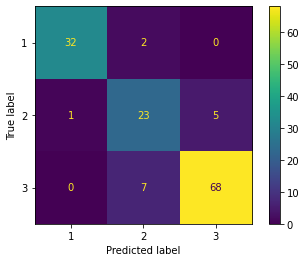

In [145]:
sk.metrics.plot_confusion_matrix(clf, X_test, y_test)

#sk.metrics.confusion_matrix(y_val, y_pred, labels=[1,2,3])
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

print(f'Training score: {round(score_train,2)}%, test score: {round(score_test,2)}%')

In [149]:
X_train['p1']

0      10.458564
1      10.518989
2      10.499559
3      10.441188
4      10.746925
         ...    
715     7.511212
716     7.538933
717     8.258355
718     5.381996
719     9.264445
Name: p1, Length: 582, dtype: float64

Linear - Training score:  0.8676975945017182
Linear - Validation score:  0.8913043478260869


Text(0.5, 1.0, 'Linear C =1, Train-acc = 86.77%, Valid-acc = 89.13%')

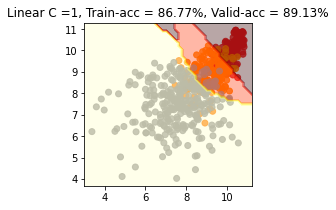

In [153]:
color_map = plt.cm.get_cmap("Set1")
plt.figure(figsize=(3, 3))

s_tra = clf.score(X_train, y_train)
s_val = clf.score(X_test, y_test)
print('Linear - Training score: ', s_tra)
print('Linear - Validation score: ', s_val)
plt.scatter(X_train['p1'], X_train['p2'], c=y_train, alpha=0.8, cmap=color_map)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    

plt.contourf(xx, yy, Z, alpha=0.35, cmap='hot')
    

plt.title("Linear C =" + str(g) +
            ', Train-acc = ' + '{0:.2f}'.format(100 * s_tra) + '%'
            +
            ', Valid-acc = ' + '{0:.2f}'.format(100 * s_val) + '%'
            )